<a href="https://colab.research.google.com/github/stazam/M7DataSp---Advanced-data-science-techniques/blob/main/mask_vs_no_mask_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import cv2


from keras.utils import np_utils
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.3.0


#Data uploading from directory

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving facemask (1).jpg to facemask (1).jpg
Saving facemask (1).png to facemask (1).png
Saving facemask (2).jpg to facemask (2).jpg
Saving facemask (2).png to facemask (2).png
Saving facemask (3).jpg to facemask (3).jpg
Saving facemask (4).jpg to facemask (4).jpg
Saving facemask (5).jpg to facemask (5).jpg
Saving facemask (6).jpg to facemask (6).jpg
Saving facemask (7).jpg to facemask (7).jpg
Saving facemask (8).jpg to facemask (8).jpg
Saving facemask (9).jpg to facemask (9).jpg
Saving facemask (10).jpg to facemask (10).jpg
Saving facemask (11).jpg to facemask (11).jpg
Saving facemask (12).jpg to facemask (12).jpg
Saving facemask (13).jpg to facemask (13).jpg
Saving facemask (14).jpg to facemask (14).jpg
Saving facemask (15).jpg to facemask (15).jpg
Saving facemask (16).jpg to facemask (16).jpg
Saving facemask (17).jpg to facemask (17).jpg
Saving facemask (18).jpg to facemask (18).jpg
Saving facemask (19).jpg to facemask (19).jpg
Saving facemask (20).jpg to facemask (20).jpg
Saving fac

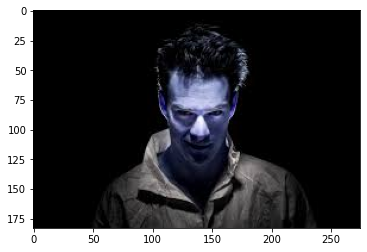

In [ ]:
img = cv2.imread('nomask (58).jpg')
plt.imshow(img)

In [ ]:
import os 
import cv2
local_download_path = os.path.expanduser('/content/')

labels = []
images = []

for file in os.listdir(local_download_path):

    file_name, file_extension = os.path.splitext(file)
    if (file_extension in ['.png','.jpg']):
       img = cv2.imread(file)
       img = cv2.resize(img,(160,160))     
       images.append(img)

       if file[0] == "f":
           labels.append(0)
       else:
           labels.append(1)

images = np.array(images)
labels = np.array(labels)

In [ ]:
print(images.shape)
print(labels.shape)


image = cv2.imread("facemask (31).jpg")
print("Max intensity of pixels is: %d and minimal intensity is: %d " %(image.max(),image.min()))

(224, 160, 160, 3)
(224,)
Max intensity of pixels is: 255 and minimal intensity is: 0 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size = 0.8, random_state = 20)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

X_train = X_train/255.0
X_test = X_test/255.

In [ ]:
y_test

array([1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.experimental.preprocessing import Rescaling
from keras.layers import Convolution2D, MaxPooling2D,BatchNormalization
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras import optimizers

In [ ]:
train_datagen = ImageDataGenerator(
featurewise_center=True,
featurewise_std_normalization=True,
rotation_range=40,
width_shift_range=0.1,
height_shift_range=0.2,
horizontal_flip=True)

In [ ]:
#rescale = Rescaling(1./255., input_shape = (img_size, img_size, 3))

In [ ]:
img_size = 160
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_size, img_size, 3))

top_model = Sequential()

top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation="relu"))
top_model.add(Dense(128, activation="relu"))
top_model.add(BatchNormalization())
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation="sigmoid"))

new_model = Sequential() #new model

#new_model.add(rescale)

for layer in model.layers: 
    new_model.add(layer)


new_model.add(top_model)


for layer in model.layers[:21]:
    layer.trainable = False


new_model.compile(loss="binary_crossentropy",
 optimizer= 'rmsprop',
 metrics=["accuracy"])

new_model.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 40, 40, 256)     

#Transfer learning

In [ ]:
models_data = new_model.fit(train_datagen.flow(X_train, y_train, batch_size=16),epochs=10,validation_data=(X_test,y_test))             


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
12/12 [==============================] - 1s 104ms/step - loss: 0.6270 - accuracy: 0.7151 - val_loss: 1.6066 - val_accuracy: 0.5333
Epoch 2/10
12/12 [==============================] - 1s 94ms/step - loss: 0.5151 - accuracy: 0.7765 - val_loss: 2.7569 - val_accuracy: 0.5333
Epoch 3/10
12/12 [==============================] - 1s 86ms/step - loss: 0.3055 - accuracy: 0.8771 - val_loss: 0.9220 - val_accuracy: 0.6889
Epoch 4/10
12/12 [==============================] - 1s 85ms/step - loss: 0.2970 - accuracy: 0.8603 - val_loss: 0.7953 - val_accuracy: 0.7556
Epoch 5/10
12/12 [==============================] - 1s 86ms/step - loss: 0.2669 - accuracy: 0.8771 - val_loss: 3.4412 - val_accuracy: 0.5333
Epoch 6/10
12/12 [==============================] - 1s 87ms/step - loss: 0.2493 - accuracy: 0.9274 - val_loss: 0.8495 - val_accuracy: 0.7333
Epoch 7/10
12/12 [==============================] - 1s 85ms/step - loss: 0.2212 - accuracy: 0.9330 - val_loss: 0.3200 - val_accuracy: 0.8889
Epoch 8/10
1

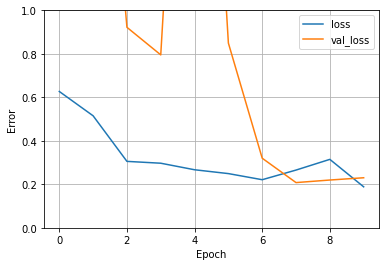

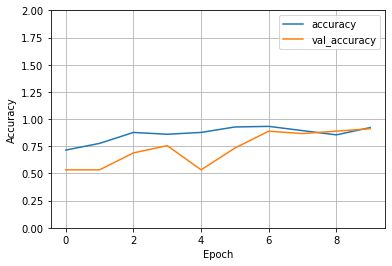

In [ ]:
def plot_loss(model):
  plt.figure(1)
  plt.plot(model.history['loss'], label='loss')
  plt.plot(model.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

  plt.figure(2)
  plt.plot(model.history['accuracy'], label='accuracy')
  plt.plot(model.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)


plot_loss(models_data)

In [ ]:
new_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 40, 40, 256)     

#Fine tunning


In [ ]:
for layer in new_model.layers[:21]:
    layer.trainable = True

In [ ]:
new_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 40, 40, 256)     

In [ ]:
models_data_fine_tunning = new_model.fit(train_datagen.flow(X_train, y_train, batch_size=16),epochs=2,validation_data=(X_test,y_test))        

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/2
12/12 [==============================] - 1s 88ms/step - loss: 0.2550 - accuracy: 0.8994 - val_loss: 0.2205 - val_accuracy: 0.9556
Epoch 2/2
12/12 [==============================] - 1s 85ms/step - loss: 0.1684 - accuracy: 0.9274 - val_loss: 0.2712 - val_accuracy: 0.9556


In [ ]:
score = new_model.evaluate(X_test, y_test, verbose=0)
print("Loss after fine tunnig is: %f" %(score[0]))
print("Accuracy after fine tunnig is: %f"  %(score[1]))

Loss after fine tunnig is: 0.271235
Accuracy after fine tunnig is: 0.955556


In [ ]:
def prediction(file):

  img = cv2.imread(file)
  img = cv2.resize(img,(160,160))
  plt.imshow(img)
  #img = img/255
  img = np.expand_dims(img, axis=0)

  prediction = new_model.predict(img)[0,0]
  if prediction < 0.5:
    return "with_mask"
  else:
    return "no_mask"


'no_mask'

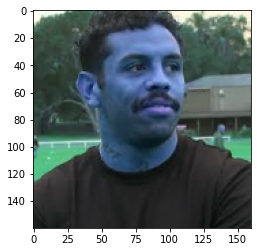

In [ ]:
prediction("nomask (89).jpg")



In [ ]:
pip install tensorflowjs

     |████████████████████████████████| 71kB 3.6MB/s 


In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(new_model, "./export_model")

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [ ]:
import shutil
shutil.make_archive("export_model", 'zip', "export_model/")

from google.colab import files
files.download('export_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>